In [1]:
%matplotlib inline 
#jupyter notebook 中的魔法函数，如果不是使用该软件请使用plt.show()用于显示图像
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

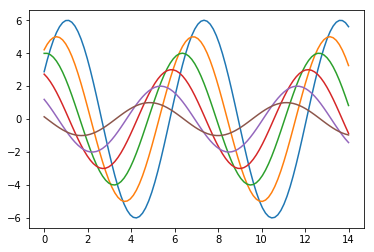

In [2]:
def sinplot(flip=1):
    x = np.linspace(0,14,100)
    for i in range(1,7):
        plt.plot(x,np.sin(x+i*.5)*(7-i)*flip)
sinplot()

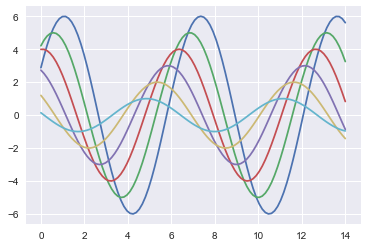

In [4]:
import seaborn as sns
sns.set()
sinplot()

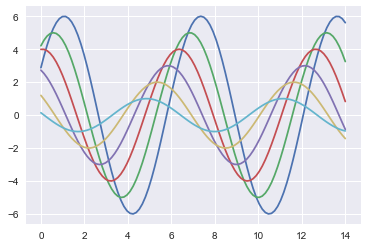

In [9]:
#样式控制：axes_style() and set_style()
#5个seaborn主题：
#darkgrid 黑色网格（默认）
#whitegrid 白色网格
#dark 黑色背景
#white 白色背景
#ticks 四周都有刻度线的白背景
sns.set_style('darkgrid')
sinplot()

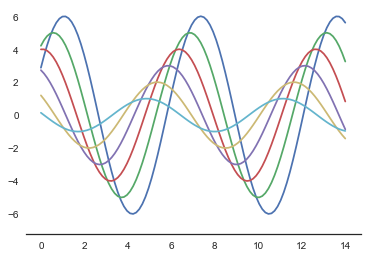

In [14]:
#despine()进行边框控制
#offset参数控制偏移量 trim限制留存的边框范围
sns.set_style("white")
sinplot() # 默认无参数状态，就是删除上方和右方的边框
sns.despine(offset = 10,left = True)

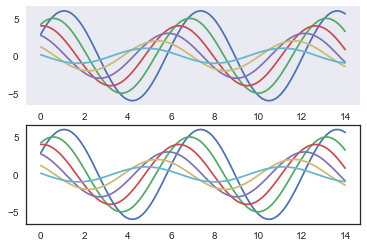

In [17]:
#使用with 临时设定图形样式
#虽然来回切换非常容易，但sns也允许用with语句中套用axes_style()达到临时设置参数的效果
#（仅对with块内的绘图函数起作用）。这也允许创建不同风格的坐标轴。
with sns.axes_style("dark"):
    plt.subplot(211)
    sinplot()
plt.subplot(212)
sinplot()

d:\python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


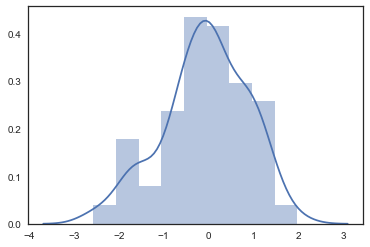

In [21]:
#数据可视化
#单变量分布
x = np.random.normal(size=100)
sns.distplot(x);

d:\python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


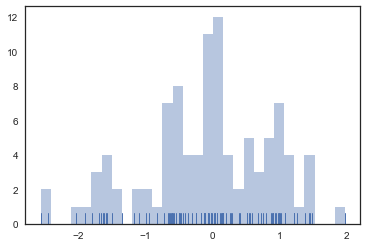

In [28]:
#直方图hist  kda表示核密度估计，rug表示地毯图，bins表示切分刻度
sns.distplot(x,bins=30, kde=False, rug=True);

In [30]:
#双变量分布
import pandas as pd
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
#生成一个多元正太分布矩阵；mean是多维分布的均值维度；cov：协方差矩阵
#size：指定生成的正太分布矩阵的维度
df = pd.DataFrame(data, columns=["x", "y"])

d:\python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


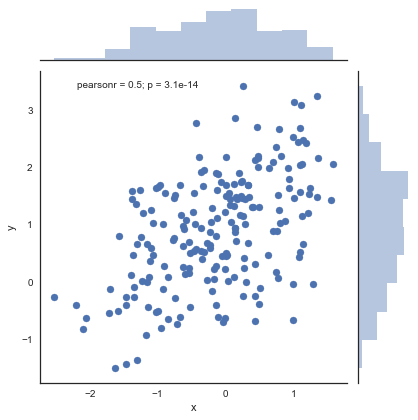

In [31]:
#散点图
sns.jointplot(x="x", y="y", data=df);

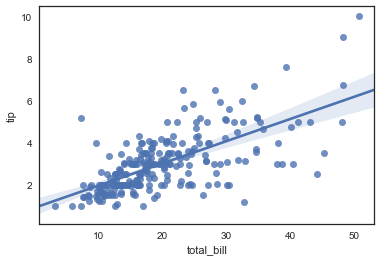

In [33]:
#绘制线性回归模型的函数
tips = sns.load_dataset("tips")
sns.regplot(x="total_bill", y="tip", data=tips);

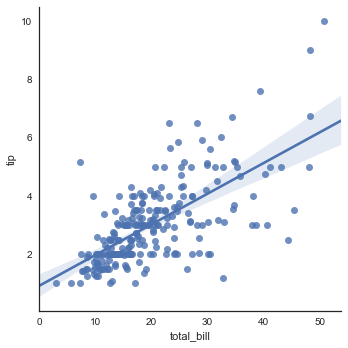

In [34]:
sns.lmplot(x="total_bill", y="tip", data=tips);

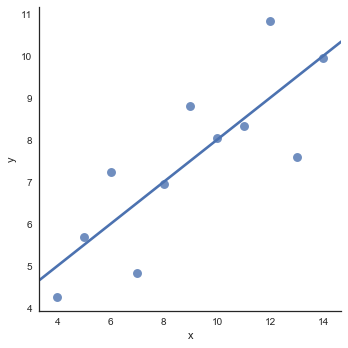

In [35]:
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

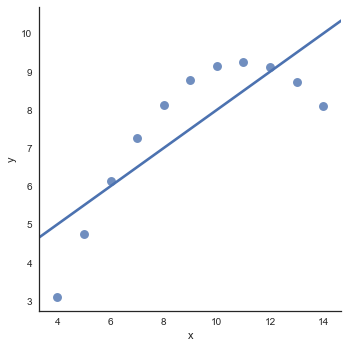

In [36]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

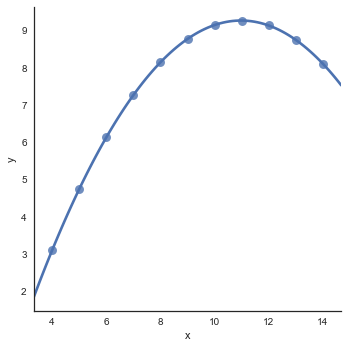

In [37]:
#在存在这些高阶关系的情况下，lmplot()和regplot()可以拟合多项式回归模型来拟合数据集中的简单类型的非线性趋势：
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

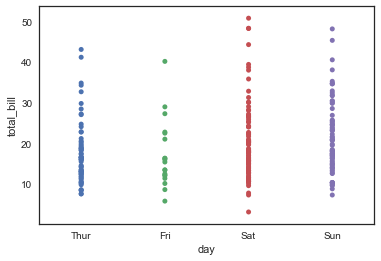

In [43]:
#分类数据的绘制
#分类散点图
sns.stripplot(x="day", y="total_bill", data=tips);


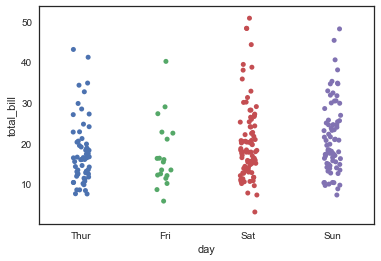

In [44]:
#在条纹图中，散点图通常将重叠。这使得很难看到数据的完整分布。一个简单的解决方案是使用一些随机的“抖动”调整位置（仅沿着分类轴）
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True);

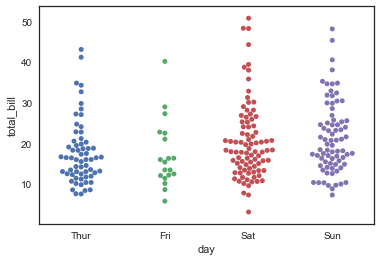

In [45]:
#不同的方法是使用函数swarmplot()，它使用避免重叠点的算法将分类轴上的每个散点图点定位：
sns.swarmplot(x="day", y="total_bill", data=tips);

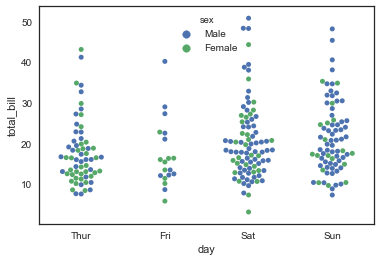

In [46]:
#当然也可以传入hue参数添加多个嵌套的分类变量。高于分类轴上的颜色和位置时冗余的，现在每个都提供有两个变量之一的信息：
sns.swarmplot(x="day", y="total_bill", hue="sex",data=tips);

In [47]:
#分类内的观测分布
#分类散点图固然简单实用，但在某些特定的的情况下，他们可以提供的值的分布信息会变得及其有限（并不明晰）。 
#有几种方式可以方便的解决这个问题，在类别之间进行简单比较并汇总信息，我们快速讨论并比较一些适合这类数据观测的函数。


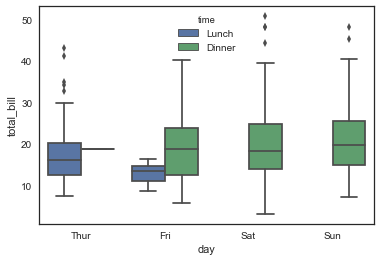

In [48]:
#箱线图
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

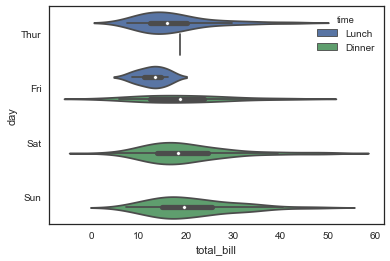

In [49]:
#提琴图
sns.violinplot(x="total_bill", y="day", hue="time", data=tips);

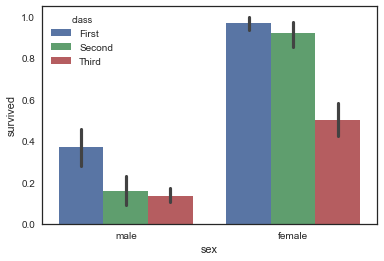

In [51]:
#类别内的统计估计
#条形图
# 在Seaborn中barplot()函数在完整数据集上运行，并显示任意估计，默认情况下  使用均值。 
#当在每个类别中有多个观察值时，它还使用引导来计算估计周围的置信区间，并绘制使用误差条：
titanic = sns.load_dataset("titanic")
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

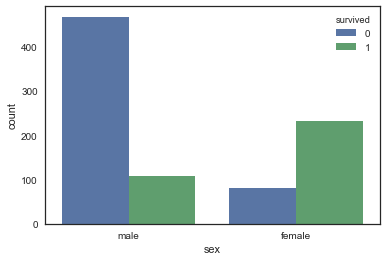

In [55]:
#想要显示每个类别中的观察次数，而不是计算第二个变量的统计量
sns.countplot(x="sex",  hue="survived", data=titanic);

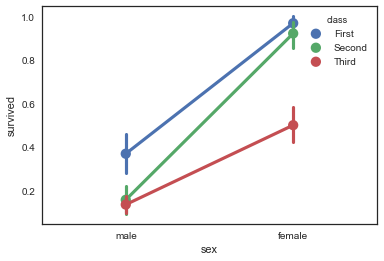

In [56]:
#点图
#pointplot()函数提供了可视化相同信息的另一种风格。
#该函数还对另一轴的高度估计值进行编码，而不是显示一个完整的柱型，它只绘制点估计和置信区间。
#另外，点图连接相同hue类别的点。
#这使得很容易看出主要关系如何随着第二个变量的变化而变化，因为你的眼睛很好地收集斜率的差异：
sns.pointplot(x="sex", y="survived", hue="class", data=titanic);

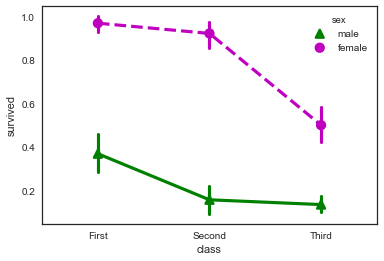

In [57]:
#为了使能够在黑白中重现的图形，可以使用不同的标记和线条样式来展示不同hue类别的层次:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

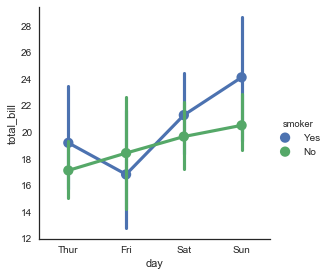

In [58]:
#绘制多层面板分类图
#正如我们上面提到的，有两种方法可以在Seaborn中绘制分类图。
#与回归图中的二元性相似，您可以使用上面介绍的函数，也可以使用更高级别的函数factorplot()，
#将这些函数与FacetGrid()相结合，通过这个图形的更大的结构来增加展示其他类别的能力。 
#默认情况下，factorplot()产生一个pairplot()：
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips);

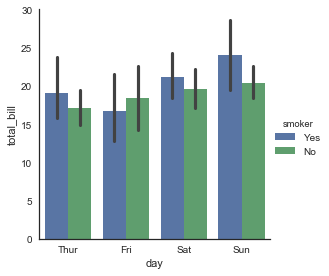

In [59]:
#然而，kind参数可以让您选择以上讨论的任何种类的图：
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar");

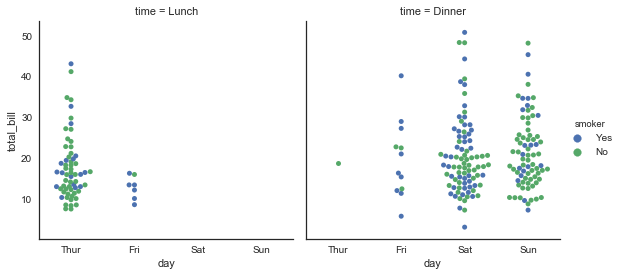

In [60]:
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="swarm");

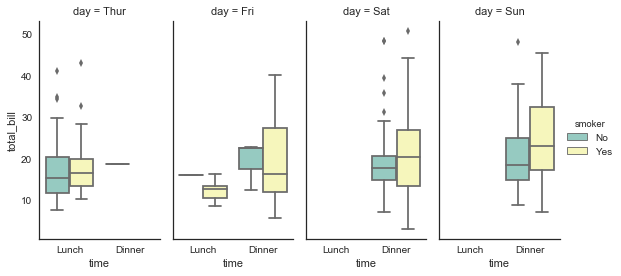

In [61]:
#任何一种图形都可以画出来。基于FacetGrid的工作原理，要更改图形的大小和形状，需要指定适用于每个方面的size和aspect参数：
sns.factorplot(x="time", y="total_bill", hue="smoker",hue_order=["No","Yes"]
               ,col="day", data=tips, kind="box", size=4, aspect=.5,
              palette="Set3");